O dataset diabetes disponibilizado pelo scikit-learn é proveniente de uma pesquisa conduzida por Efron et al. (1976), no contexto do desenvolvimento de técnicas de regressão estatística, como o LASSO (Least Absolute Shrinkage and Selection Operator). Os dados foram originalmente coletados pela Clínica Médica da Universidade de Leiden, nos Países Baixos, para estudar a progressão da diabetes.

Attribute Information:
* age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

In [30]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('DiabetesOriginalA.csv')
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
0,59,feminino,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,masculino,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,feminino,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,masculino,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,masculino,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,feminino,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,feminino,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,feminino,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,masculino,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [31]:
#Resumo conciso do DataFrame, incluindo
#número total de entradas (ou linhas), nomes das colunas,
#tipo de dado de cada coluna, número de valores não nulos em cada coluna
#uso de memória do DataFrame.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    int64  
 1   sex         442 non-null    object 
 2   bmi         398 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    int64  
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    int64  
 10  progressao  442 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB


In [32]:
#Frequência de valores únicos: quantos homens, quantas mulheres
sexo_frequencia = diabetes['sex'].value_counts()
sexo_frequencia


sex
masculino    235
feminino     207
Name: count, dtype: int64

In [33]:
#Resumo estatístico com várias métricas descritivas das colunas numéricas.
#Essas métricas ajudam a entender a distribuição dos dados.
#Estas métricas são: count, mean, std, min, primeiro quartil (Q1), 
#segundo quartil (Q2) (mediana), O terceiro quartil (Q3) e max
resumo_estatistico = diabetes.describe()
resumo_estatistico


,age,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
count,442.000000,398.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.356784,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.359678,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.100000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.125000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.200000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,41.300000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


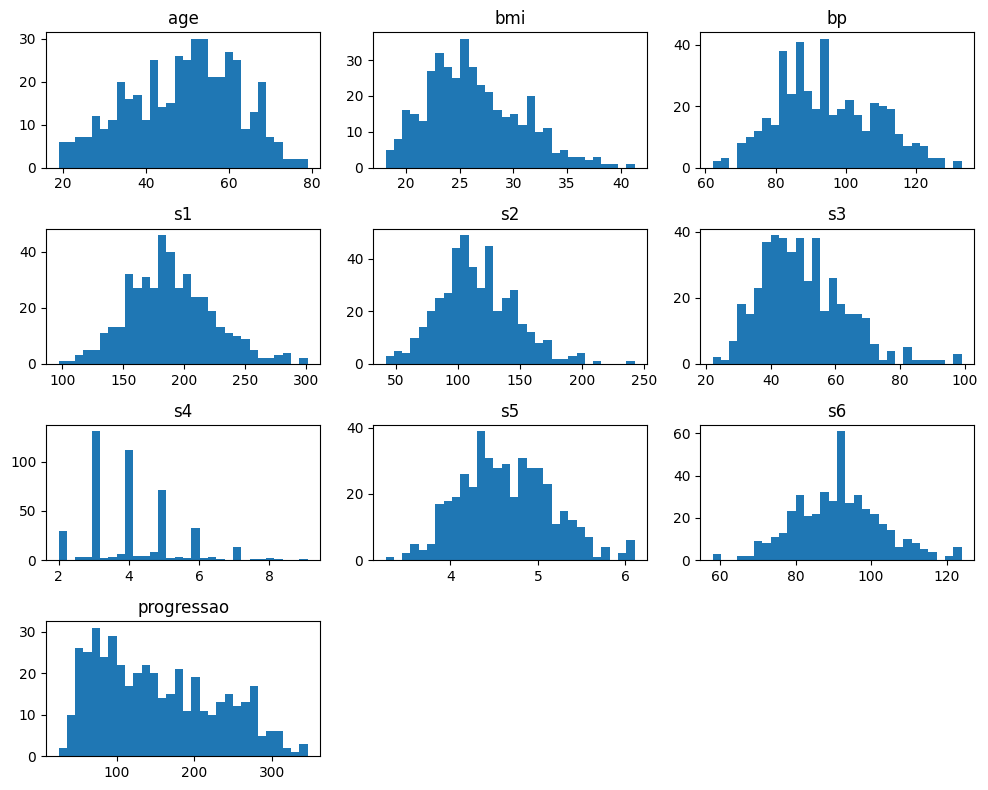

In [34]:
#histogramas
import matplotlib.pyplot as plt

# Criar histogramas para cada coluna numérica
diabetes.hist(bins=30, figsize=(10, 8), grid=False)
plt.tight_layout()
plt.show()

**Observações**<br>

**Como saber se é uma distribuição normal sem ser no olhômetro? Ver outro notebook**

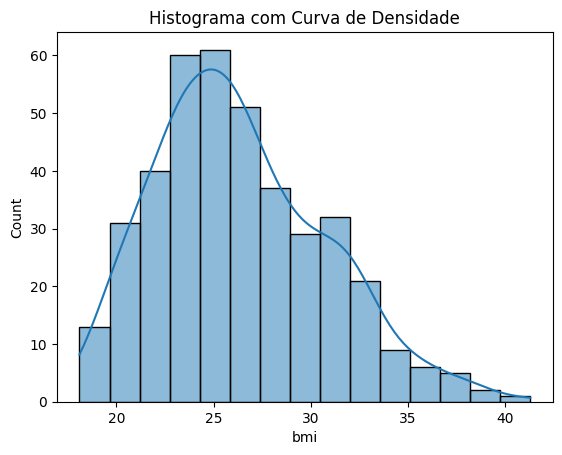

In [35]:
import seaborn as sns

# Histograma com a curva de densidade
sns.histplot(diabetes['bmi'], kde=True)
plt.title('Histograma com Curva de Densidade')
plt.show()

**Amostragem estratificada é necessária no dataset diabetes?<br>**
Não, mas poderíamos fazer para praticar.<br>
Opções:<br>
* bmi é uma variável contínua, mas frequentemente discretizada em faixas na área da saúde. Discretizar o BMI pode ser útil para identificar como categorias de peso influenciam a progressão da diabetes. Exemplo:
> Abaixo do peso (BMI < 18.5)<br>
> Peso normal (BMI 18.5–24.9)<br>
> Sobrepeso (BMI 25–29.9)<br>
< Obesidade (BMI > 30)<br>
* bp pode ser discretizada em faixas clinicamente relevantes:
> Normal: Menor que 120/80 mmHg<br>
> Pré-hipertensão: Entre 120–139 mmHg<br>
> Hipertensão estágio 1: Entre 140–159 mmHg<br>
> Hipertensão estágio 2: Maior que 160 mmHg<br>
* age:
> Jovens (0–30)<br>
> Adultos (31–50)<br>
> Idosos (>50)<br>

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

#Usar o StratifiedShuffleSplit para a feature sex para que o conjunto de treinamento 
#e o conjunto de teste tenham a mesma proporção masculino/feminino que o dataset inteiro
# Definindo o StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Criar as amostras
for train_index, test_index in split.split(diabetes, diabetes['sex']):
    train_set = diabetes.loc[train_index]
    test_set = diabetes.loc[test_index]

# Verificando a proporção de sexos
print("Proporção no conjunto de treinamento:")
print(train_set['sex'].value_counts(normalize=True))
print("\nProporção no conjunto de teste:")
print(test_set['sex'].value_counts(normalize=True))


Proporção no conjunto de treinamento:
sex
masculino    0.532578
feminino     0.467422
Name: proportion, dtype: float64

Proporção no conjunto de teste:
sex
masculino    0.52809
feminino     0.47191
Name: proportion, dtype: float64


In [37]:
#exiba as 3 primeiras linhas dos conjuntos de treinamento e teste e mostre o tipo e o shape

In [38]:
train_set.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
30,32,masculino,NaN,89.0,182,110.6,56.0,3.0,4.3438,89,129
251,34,feminino,35.5,120.0,233,146.6,34.0,7.0,5.5683,101,243
79,20,masculino,NaN,87.0,191,128.2,53.0,4.0,3.8918,85,113


In [39]:
type(train_set)

pandas.core.frame.DataFrame

In [40]:
train_set.shape

(353, 11)

In [41]:
test_set.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
436,33,masculino,NaN,80.0,171,85.4,75.0,2.0,3.9703,80,48
69,53,masculino,22.1,93.0,134,76.2,46.0,3.0,4.0775,96,178
203,48,feminino,29.2,110.0,218,151.6,39.0,6.0,4.9200,98,222


In [42]:
type(test_set)

pandas.core.frame.DataFrame

In [43]:
test_set.shape

(89, 11)

In [44]:
#1 - Copiar o strat_train_set

strat_train_set = train_set.copy()

In [45]:
#2 - Combinações de atributos
strat_train_set['bmi_age_sum'] = strat_train_set['bmi'] + strat_train_set['age']
strat_train_set['bmi_age_diff'] = strat_train_set['bmi'] - strat_train_set['age']
strat_train_set['bmi_bp_sum'] = strat_train_set['bmi'] + strat_train_set['bp']
strat_train_set['age_bp_diff'] = strat_train_set['age'] - strat_train_set['bp']

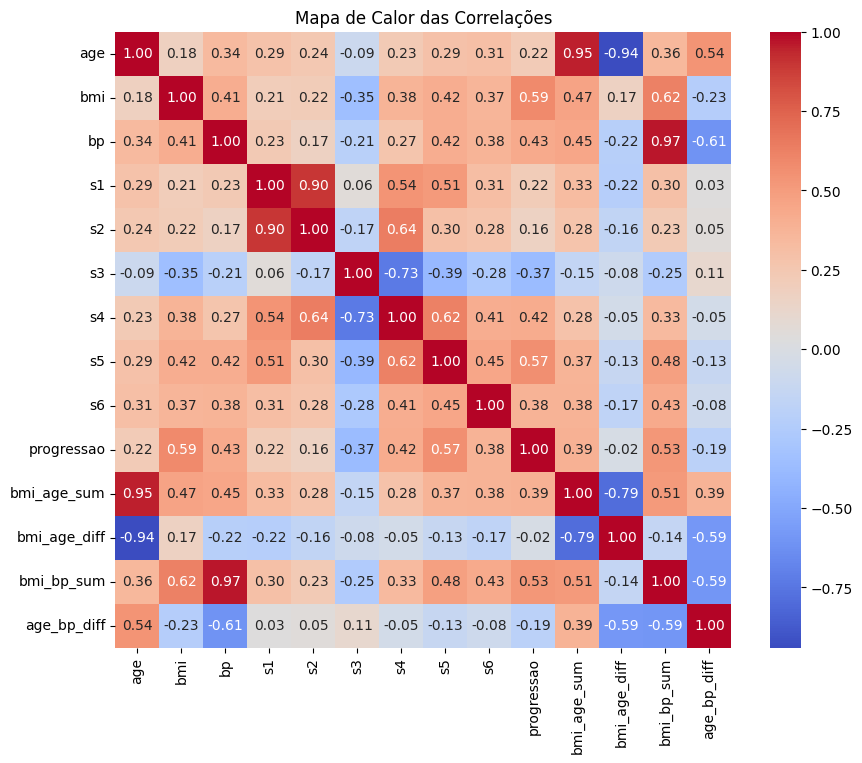

In [46]:
#Gráficos para ver as correlações
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
strat_train_set_s1 = strat_train_set.drop('sex', axis=1)
correlation_matrix = strat_train_set_s1.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

s1            1.000000
s2            0.896663
s4            0.542207
s5            0.515503
s6            0.325717
age           0.260061
bmi           0.253279
bp            0.242464
progressao    0.212022
s3            0.051519
Name: s1, dtype: float64

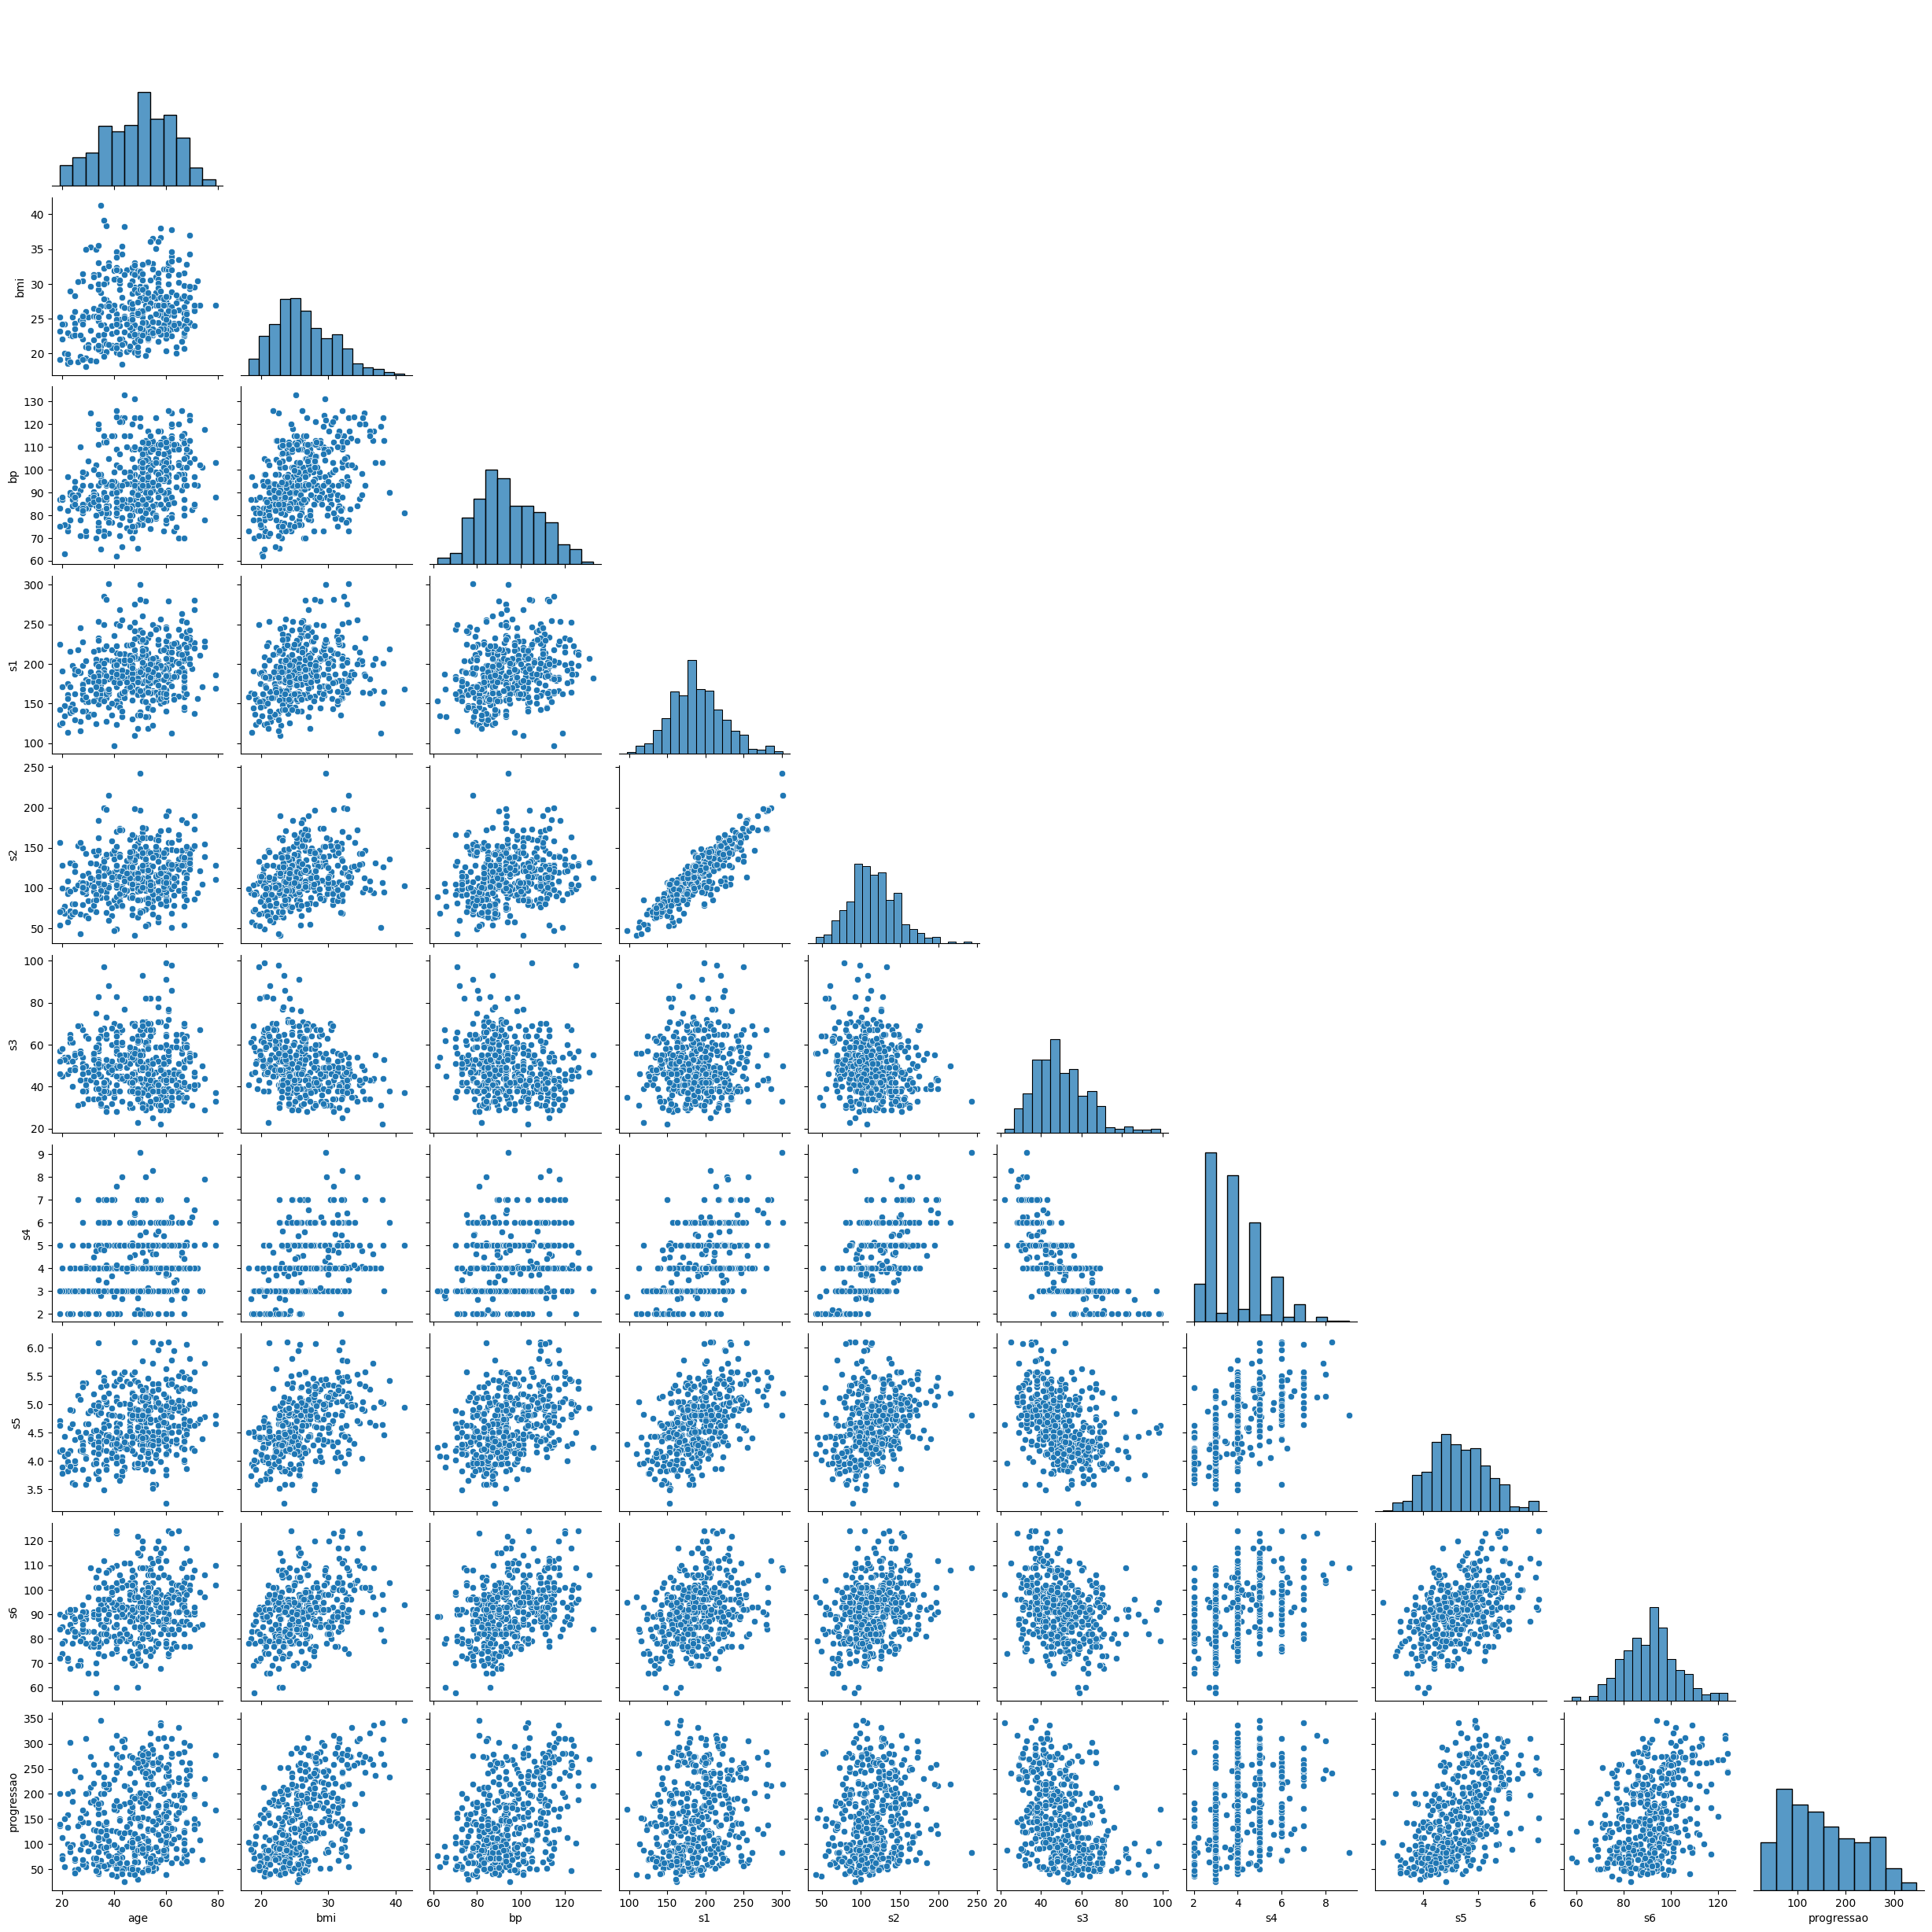

In [47]:
import seaborn as sns
sns.pairplot(diabetes, corner=True) # exibe grafico de correlação
#sns.pairplot(strat_train_set, corner=True) # exibe grafico de correlação

corr_matrix = diabetes.drop('sex', axis=1).corr() # Correlação
corr_matrix['s1'].sort_values(ascending=False) # Mostrar valores relacionando com variavel s1

**O que procurar nestes gráfico?**<br>
**Resposta: Relacionamentos lineares fortes entre features.**<br>
**Motivo: Se duas features forem altamente correlacionadas, pode valer a pena combiná-las ou excluir uma delas. Isto pode melhorar/facilitar o aprendizado e gerar um modelo melhor** 

In [48]:
#Escreva as suas descobertas

# A análise estatística indicou uma correlação positiva entre s1 (colesterol total) e s2 (LDL). Isso significa que, em geral, conforme os níveis de colesterol total aumentam, os níveis de LDL também tendem a aumentar. Esse comportamento é esperado, já que o LDL é uma parte significativa do colesterol total.


In [49]:
#Combinações de variáveis que podem melhorar a análise e a modelagem
diabetes['ldl_per_total_cholesterol'] = diabetes['s2'] / diabetes['s1']
diabetes['bmi_bp_interaction'] = diabetes['bmi'] * diabetes['bp']
diabetes['bmi_hdl_interaction'] = diabetes['bmi'] * diabetes['s3']

In [50]:
#exiba o dataframe
diabetes


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao,ldl_per_total_cholesterol,bmi_bp_interaction,bmi_hdl_interaction
0,59,feminino,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151,0.593631,3242.100,1219.8
1,48,masculino,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75,0.563934,1879.200,1512.0
2,72,feminino,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141,0.600000,2836.500,1250.5
3,24,masculino,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206,0.663636,2125.200,1012.0
4,50,masculino,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135,0.653125,2323.000,1196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,60,feminino,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178,0.615135,3158.400,1184.4
438,47,feminino,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104,0.737778,1867.500,1045.8
439,60,feminino,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132,0.658025,2481.783,1070.7
440,36,masculino,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220,0.622886,2850.000,1260.0


In [51]:
#corr_matrix novamente
corr_matrix = diabetes.drop('sex', axis=1).corr() # Correlação
corr_matrix['s1'].sort_values(ascending=False) # Mostrar valores relacionando com variavel s1

s1                           1.000000
s2                           0.896663
s4                           0.542207
s5                           0.515503
ldl_per_total_cholesterol    0.430805
s6                           0.325717
bmi_bp_interaction           0.297803
age                          0.260061
bmi                          0.253279
bp                           0.242464
progressao                   0.212022
bmi_hdl_interaction          0.195521
s3                           0.051519
Name: s1, dtype: float64

In [52]:
#Escreva as suas descobertas
# ldl_per_total_cholesterol tem correlação tanto com s1 como s2

In [53]:
#se alguma combinação não ficou boa, "dropa"
#lembre-se do axis=1
#exiba as 3 primeiras linhas

# bmi_bp_interaction e bmi_hdl_interaction nao foram boas correlações
diabetes = diabetes.drop('bmi_bp_interaction', axis=1)
diabetes = diabetes.drop('bmi_hdl_interaction', axis=1)
diabetes.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao,ldl_per_total_cholesterol
0,59,feminino,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,0.593631
1,48,masculino,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,0.563934
2,72,feminino,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,0.600000


In [66]:
#3 - separar preditores e valores-alvos
diabetes_preds = diabetes.drop('progressao', axis=1)
diabetes_labels = diabetes['progressao'].copy()

In [79]:
#4 - Tratamento de valores ausentes com a classe Imputer
from sklearn.impute import SimpleImputer

# diabetes_preds = diabetes_preds.drop('sex', axis=1)
imputer = SimpleImputer(strategy='median')
imputer.fit_transform(diabetes_preds)
diabetes_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        442 non-null    int64  
 1   bmi                        398 non-null    float64
 2   bp                         442 non-null    float64
 3   s1                         442 non-null    int64  
 4   s2                         442 non-null    float64
 5   s3                         442 non-null    float64
 6   s4                         442 non-null    float64
 7   s5                         442 non-null    float64
 8   s6                         442 non-null    int64  
 9   ldl_per_total_cholesterol  442 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 34.7 KB


In [83]:
#criar dataframe com valores ausentes resolvidos
#exibir info()
# substituir os valores ausentes pelas medianas
X = imputer.transform(diabetes_preds)
contaNull= np.sum(np.isnan(X))
contaNull

diabetes_preds_si = pd.DataFrame(X, columns=diabetes_preds.columns, index=diabetes_preds.index)
diabetes_preds_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        442 non-null    float64
 1   bmi                        442 non-null    float64
 2   bp                         442 non-null    float64
 3   s1                         442 non-null    float64
 4   s2                         442 non-null    float64
 5   s3                         442 non-null    float64
 6   s4                         442 non-null    float64
 7   s5                         442 non-null    float64
 8   s6                         442 non-null    float64
 9   ldl_per_total_cholesterol  442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [84]:
#5 - Manipulação de textos e atributos categóricos com a classe OneHotEncoder
#lembre que não pode ser unidimensional
#exiba o resultado


diabetes_preds_si


,age,bmi,bp,s1,s2,s3,s4,s5,s6,ldl_per_total_cholesterol
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,0.593631
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,0.563934
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,0.600000
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,0.663636
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,0.653125
...,...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,0.615135
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,0.737778
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,0.658025
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,0.622886


In [90]:
#6 - Feature scaling
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()

# StandardSacler aceita array numpy multidimensional e DataFrame
diabetes_labels_sc =                \
target_scaler.fit_transform(diabetes_labels.to_frame())
diabetes_labels_sc

diabetes_labels_sc_df = pd.DataFrame(diabetes_labels_sc, columns=['progressao'])
diabetes_labels_sc_df.head()

,progressao
0,-0.014719
1,-1.001659
2,-0.144580
3,0.699513
4,-0.222496


In [59]:
# criar dataframe escalado e juntar a variável categórica codificada
#exibir as 3 primeiras linhas








In [60]:
#7 - treinamento com cross validation




In [61]:
#LinearRegression







In [62]:
# DecisionTreeRegressor








In [63]:
# RandomForestRegressor







In [64]:
#Qual foi melhor?



In [65]:
#Repetir para os dados de teste usando os dois melhores